Data Exploration: (Score : 2)
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

Data Cleaning: (Score : 2)
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis: (Score : 2)
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

Data Encoding: (Score : 2)
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Feature Scaling: (Score : 2)
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [8]:
df = pd.read_csv("C:\\Users\\aniru\\Downloads\\Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Exploration:
Explore the data

list down the unique values in each feature and find its length.

Perform the statistical analysis and renaming of the columns.

In [19]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [21]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [25]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [27]:
# to list down the unique values in each feature and find its length
unique_values = df.nunique()
print(unique_values)

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [33]:
feature_lengths = df.shape[1]
print("Number of fetures:", feature_lengths)

Number of fetures: 6


In [41]:
# to perform the statistical analysis
summary_stats = df.describe()
summary_stats

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [55]:
# renaming of the columns
df = df.rename(columns = {'Place':'City'})
df.head(0)

,Company,Age,Salary,City,Country,Gender


## Data Cleaning
Find the missing and inappropriate values, treat them appropriately.

Remove all duplicate rows.

Find the outliers.

Replace the value 0 in age as NaN

Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [62]:
# Find the missing and inappropriate values, treat them appropriately.
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company     8
Age        18
Salary     24
City       14
Country     0
Gender      0
dtype: int64


In [64]:
# Replace missing values with mean, median and mode 
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [66]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64


In [155]:
# Replace 0 with "Female" and 1 with "Male" (assuming 1 is the other value)
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female
2,TCS,35.0,2300.000000,Calcutta,India,Female
3,Infosys,40.0,3000.000000,Delhi,India,Female
4,TCS,23.0,4000.000000,Mumbai,India,Female
...,...,...,...,...,...,...
139,Congnizant,22.0,2934.000000,Noida,India,Female
140,Infosys,44.0,4034.000000,Hyderabad,India,Female
141,TCS,33.0,5034.000000,Calcutta,India,Female
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,Female


In [ ]:
# Remove all duplicate rows.
df.duplicated().sum()

In [70]:
df.shape

(148, 6)

In [72]:
df.drop_duplicates(inplace = True)

In [74]:
df.shape

(144, 6)

In [159]:
# Check for outliers in Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
   Company   Age       Salary      City Country  Gender
0      TCS  20.0  5312.467742   Chennai   India  Female
1  Infosys  30.0  5312.467742    Mumbai   India  Female
2      TCS  35.0  2300.000000  Calcutta   India  Female
3  Infosys  40.0  3000.000000     Delhi   India  Female
4      TCS  23.0  4000.000000    Mumbai   India  Female


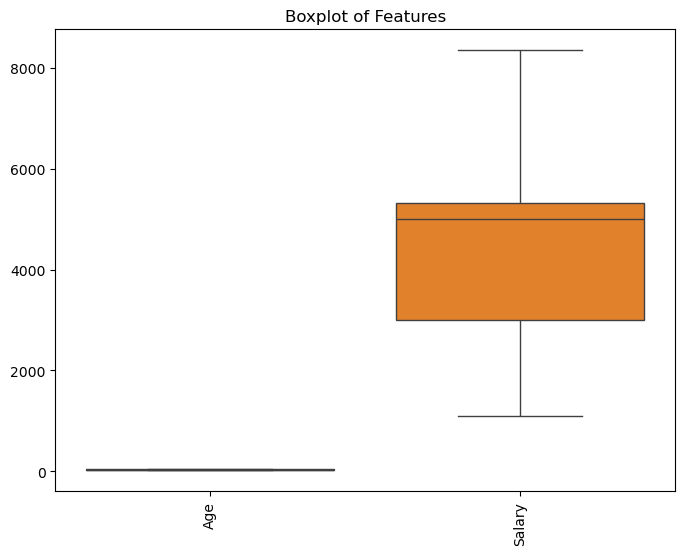

In [161]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title("Boxplot of Features")
plt.show()

In [163]:
# Check for outliers in Salary column
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

print("Cleaned dataset:")
print(df.head())

Cleaned dataset:
   Company   Age       Salary      City Country  Gender
0      TCS  20.0  5312.467742   Chennai   India  Female
1  Infosys  30.0  5312.467742    Mumbai   India  Female
2      TCS  35.0  2300.000000  Calcutta   India  Female
3  Infosys  40.0  3000.000000     Delhi   India  Female
4      TCS  23.0  4000.000000    Mumbai   India  Female


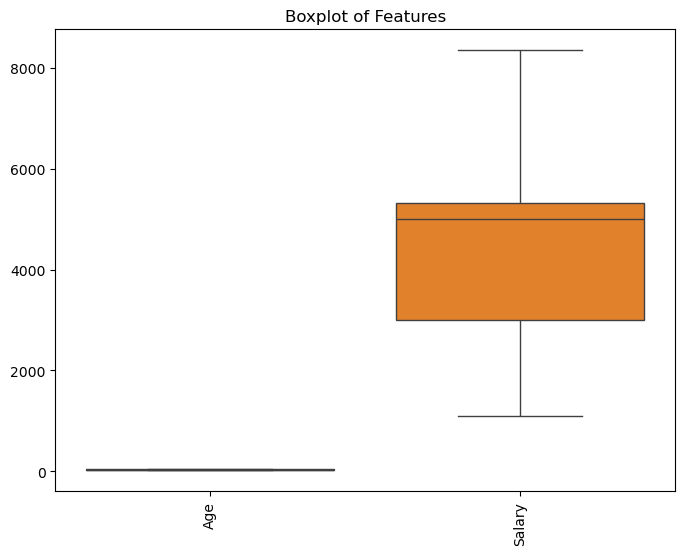

In [165]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title("Boxplot of Features")
plt.show()

In [167]:
# Replace the value 0 in age as NaN
df['Age'] = df['Age'].replace(0, np.nan)
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female
2,TCS,35.0,2300.000000,Calcutta,India,Female
3,Infosys,40.0,3000.000000,Delhi,India,Female
4,TCS,23.0,4000.000000,Mumbai,India,Female
...,...,...,...,...,...,...
139,Congnizant,22.0,2934.000000,Noida,India,Female
140,Infosys,44.0,4034.000000,Hyderabad,India,Female
141,TCS,33.0,5034.000000,Calcutta,India,Female
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,Female


In [169]:
# Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
print(df.isnull().sum())

Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64


Here we cant find any null values

## Data Analysis
Filter the data with age >40 and salary<5000 

Plot the chart with age and salary

Count the number of people from each place and represent it visually

In [171]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_df

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,Female
32,Infosys,45.0,4034.0,Calcutta,India,Female
39,Infosys,41.0,3000.0,Mumbai,India,Female
50,Infosys,41.0,3000.0,Chennai,India,Female
57,Infosys,51.0,3184.0,Hyderabad,India,Female
68,Infosys,43.0,4034.0,Mumbai,India,Female
75,Infosys,44.0,3000.0,Cochin,India,Female
86,Infosys,41.0,3000.0,Delhi,India,Female
93,Infosys,54.0,3184.0,Mumbai,India,Female
104,Infosys,44.0,4034.0,Delhi,India,Female


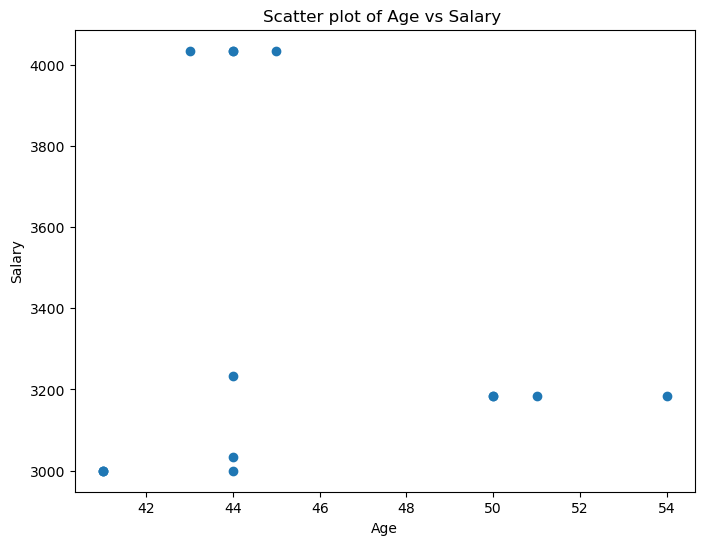

In [173]:
# plot the chart with Age and Salary
plt.figure(figsize=(8,6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter plot of Age vs Salary ')
plt.show()

In [177]:
# Count the number of people from each place and represent it visually
city_counts = df['City'].value_counts()
print(city_counts)

City
Mumbai        33
Calcutta      23
Cochin        11
Chennai       10
Delhi          9
Noida          7
Hyderabad      7
Podicherry     1
Bhopal         1
Nagpur         1
Pune           1
Name: count, dtype: int64


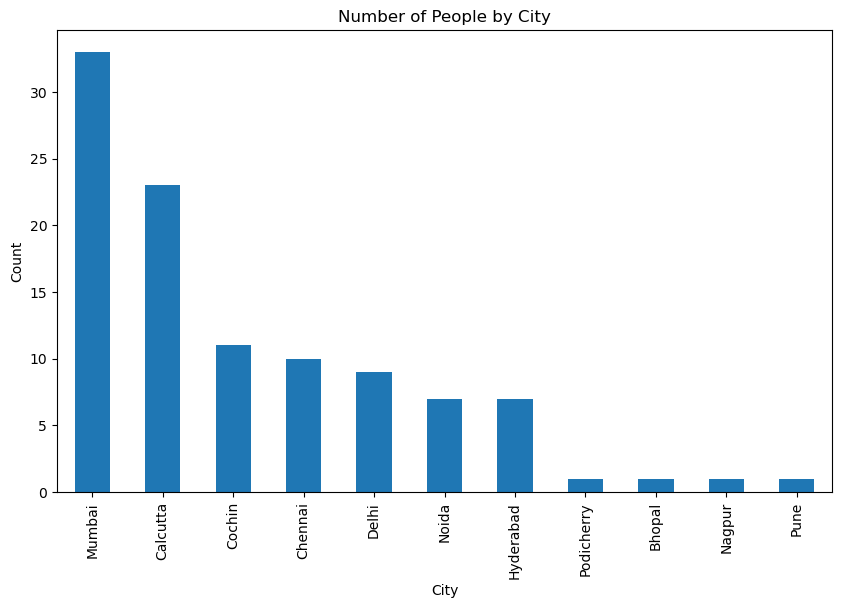

In [179]:
city_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of People by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

## Data Encoding: 
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [182]:
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,Female
1,Infosys,30.0,5312.467742,Mumbai,India,Female
2,TCS,35.0,2300.000000,Calcutta,India,Female
3,Infosys,40.0,3000.000000,Delhi,India,Female
4,TCS,23.0,4000.000000,Mumbai,India,Female
...,...,...,...,...,...,...
139,Congnizant,22.0,2934.000000,Noida,India,Female
140,Infosys,44.0,4034.000000,Hyderabad,India,Female
141,TCS,33.0,5034.000000,Calcutta,India,Female
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,Female


In [184]:
from sklearn.preprocessing import LabelEncoder

In [198]:
print("Original DataFrame:")
df.head()

Original DataFrame:


,Company,Age,Salary,City,Country,Gender,Gender_LE,City_LE,Country_LE
0,TCS,20.0,5312.467742,Chennai,India,Female,0,2,0
1,Infosys,30.0,5312.467742,Mumbai,India,Female,0,6,0
2,TCS,35.0,2300.000000,Calcutta,India,Female,0,1,0
3,Infosys,40.0,3000.000000,Delhi,India,Female,0,4,0
4,TCS,23.0,4000.000000,Mumbai,India,Female,0,6,0


In [186]:
# One-Hot Encoding (OHE)
df_ohe = pd.get_dummies(df, columns=['Gender', 'City', 'Country'])

In [200]:
print("\nOne-Hot Encoded DataFrame:")
df_ohe.head()


One-Hot Encoded DataFrame:


,Company,Age,Salary,Gender_Female,City_Bhopal,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune,Country_India
0,TCS,20.0,5312.467742,True,False,False,True,False,False,False,False,False,False,False,False,True
1,Infosys,30.0,5312.467742,True,False,False,False,False,False,False,True,False,False,False,False,True
2,TCS,35.0,2300.000000,True,False,True,False,False,False,False,False,False,False,False,False,True
3,Infosys,40.0,3000.000000,True,False,False,False,False,True,False,False,False,False,False,False,True
4,TCS,23.0,4000.000000,True,False,False,False,False,False,False,True,False,False,False,False,True


In [188]:
# Label Encoding (LE)
le = LabelEncoder()
df['Gender_LE'] = le.fit_transform(df['Gender'])
df['City_LE'] = le.fit_transform(df['City'])
df['Country_LE'] = le.fit_transform(df['Country'])

In [202]:
print("\nLabel Encoded DataFrame:")
df.head()


Label Encoded DataFrame:


,Company,Age,Salary,City,Country,Gender,Gender_LE,City_LE,Country_LE
0,TCS,20.0,5312.467742,Chennai,India,Female,0,2,0
1,Infosys,30.0,5312.467742,Mumbai,India,Female,0,6,0
2,TCS,35.0,2300.000000,Calcutta,India,Female,0,1,0
3,Infosys,40.0,3000.000000,Delhi,India,Female,0,4,0
4,TCS,23.0,4000.000000,Mumbai,India,Female,0,6,0


## Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [211]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [231]:
# Select only the numerical columns
numerical_cols = df_ohe.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Age', 'Salary'], dtype='object')

In [233]:
# Create a StandardScaler object
scaler_std = StandardScaler()
scaler_std

StandardScaler()

In [251]:
# Fit and transform the numerical data
df_scaled_std = scaler_std.fit_transform(df_ohe[numerical_cols])

In [239]:
# Convert the scaled data to a DataFrame
df_scaled_std = pd.DataFrame(df_scaled_std, columns=numerical_cols)
df_scaled_std

,Age,Salary
0,-1.395286,0.480372
1,-0.216011,0.480372
2,0.373626,-1.212075
3,0.963264,-0.818805
4,-1.041504,-0.256991
...,...,...
99,-1.159431,-0.855885
100,1.434974,-0.237889
101,0.137771,0.323925
102,-1.159431,2.103753


In [241]:
# Create a MinMaxScaler object
scaler_mm = MinMaxScaler()
scaler_mm

MinMaxScaler()

In [249]:
# Fit and transform the numerical data
df_scaled_mm = scaler_mm.fit_transform(df_ohe[numerical_cols])

In [247]:
# Convert the scaled data to a DataFrame
df_scaled_mm = pd.DataFrame(df_scaled_mm, columns=numerical_cols)
df_scaled_mm

,Age,Salary
0,0.081081,0.582066
1,0.351351,0.582066
2,0.486486,0.166896
3,0.621622,0.263368
4,0.162162,0.401185
...,...,...
99,0.135135,0.254272
100,0.729730,0.405871
101,0.432432,0.543688
102,0.135135,0.980292
